# Fundamentals of Data Analysis Assessment 2019 - Tips Dataset 

## Import libraries

In [1]:
import numpy as np
import matplotlib as plt
import seaborn as sns
import pandas as pd
import csv

## Raw Data

In [2]:
tips = pd.read_csv("https://github.com/mhurley100/Fundamentals-of-Data-Analysis-Project/raw/master/tips.csv")

In [3]:
# Add % tips to enable further analysis
tips["tip_%"] = tips["tip"] / tips["total_bill"]

In [4]:
tips

,total_bill,tip,sex,smoker,day,time,size,tip_%
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


## Descriptive statistics

In [5]:
tips.describe()

,total_bill,tip,size,tip_%
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,0.160803
std,8.902412,1.383638,0.951100,0.061072
min,3.070000,1.000000,1.000000,0.035638
25%,13.347500,2.000000,2.000000,0.129127
50%,17.795000,2.900000,2.000000,0.154770
75%,24.127500,3.562500,3.000000,0.191475
max,50.810000,10.000000,6.000000,0.710345


In [21]:
# Split the data by day and time using groupby.
tips.groupby(['time', 'day']).size()

time    day 
Dinner  Fri     12
        Sat     87
        Sun     76
        Thur     1
Lunch   Fri      7
        Thur    61
dtype: int64

In [22]:
# Split the data by gender and smoker using groupby.
tips.groupby(['sex', 'smoker']).mean()

total_bill       tip      size     tip_%     t_tip   min_tip  \
sex    smoker                                                                 
Female No       18.105185  2.773519  2.592593  0.156921  2.715778  2.586455   
       Yes      17.977879  2.931515  2.242424  0.182150  2.696682  2.568268   
Male   No       19.791237  3.113402  2.711340  0.160669  2.968686  2.827320   
       Yes      22.284500  3.051167  2.500000  0.152771  3.342675  3.183500   

                max_tip  
sex    smoker            
Female No      2.851567  
       Yes     2.831516  
Male   No      3.117120  
       Yes     3.509809

## Plots

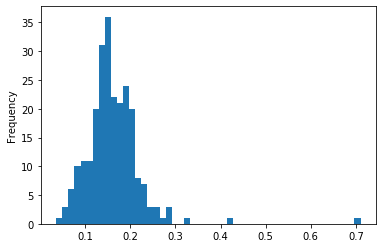

In [23]:
tips['tip_%'].plot.hist(bins=50)

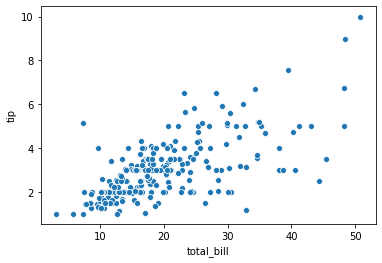

In [8]:
sns.scatterplot(x='total_bill',y='tip',data=tips)

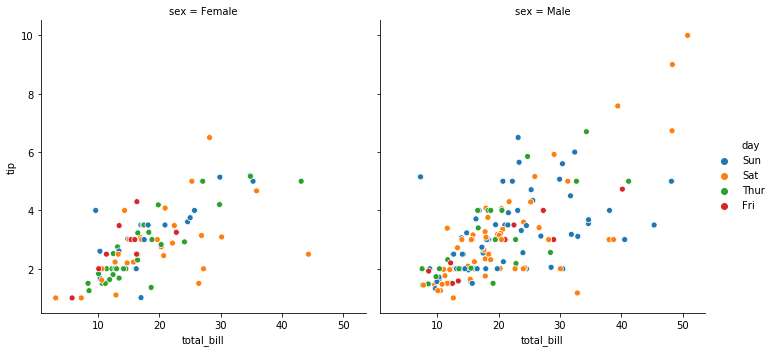

In [10]:
sns.relplot(x='total_bill',y='tip',hue='day',col='sex',data=tips)

## Regression 
There is a relationship between bill and tip.  All groups paid a tip.  From the descriptive statistcs above, average bill is 19.78, average tip is 3 with the minimum tip of 1 and max 10 and average party size is 2.5. The histogram shows that data is very closely distributed around the 15% mark meaning that this is likely the target tip.  The seaborn plots demonstrates a strong correlation between bill and tip. When tips % is added, it shows that tip rate is highly correlated.  Overall this demonstrates that tip rate is representative of the perception of 15%.  However we need to dig a bit deeper to investigate if there are any underlying trends or dynamics that warrant further analysis.  It does appear that the target is ingrained into customers but their experience will dictate if they pay more or less.

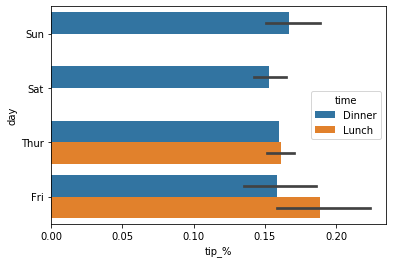

In [24]:
sns.barplot(x = 'tip_%', y = 'day', hue = 'time', data=tips, orient='h')

Establish the target tip (15% of bill)

In [13]:
tips["t_tip"] = tips["total_bill"] * 0.15

Establish minimum expected tip.  This lower range allows 5%.

In [14]:
tips["min_tip"] = tips["t_tip"] /1.05

Establish maximum expected tip.  This upper range allows 5%.

In [15]:
tips["max_tip"] = tips["t_tip"] * 1.05

A strong correlation can be demonstrated between total bill and tip.  As a result underlying relationships can be investigated. Often, logic wins through and it is fully understood that the correlation is accurate and the plots are simply establishing the strength of the relationship. But it is quite feasible that the input variable actually interacts with another (unconsidered) input variable to give the reported response in output. (Ambience)
It is also wise to remember that there is often a time interval between a cause and an effect and so occurrence of a simple cause may actually require a chain of events to lead to the resultant effect.


## Analysis

Observations:
- Everyone left a tip
- Friday lunch is highest tip
- Split of gender is not given
- Smoking and non smoking section

I will analyser] if smokers / non smokers tip differently or if siz of group is influences amount.  Gender is not so easy as the breakdown of groups is not given.    

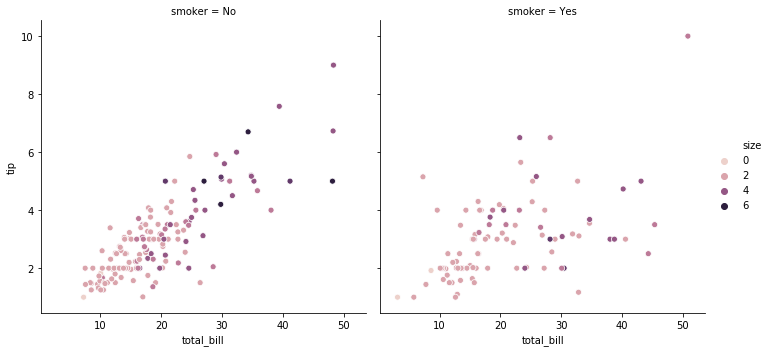

In [16]:
sns.relplot(x='total_bill',y='tip',hue='size',col='smoker',data=tips)

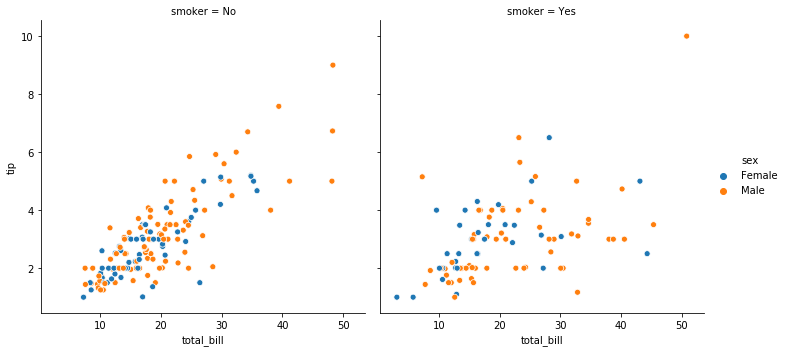

In [17]:
sns.relplot(x='total_bill',y='tip',hue='sex',col='smoker',data=tips)

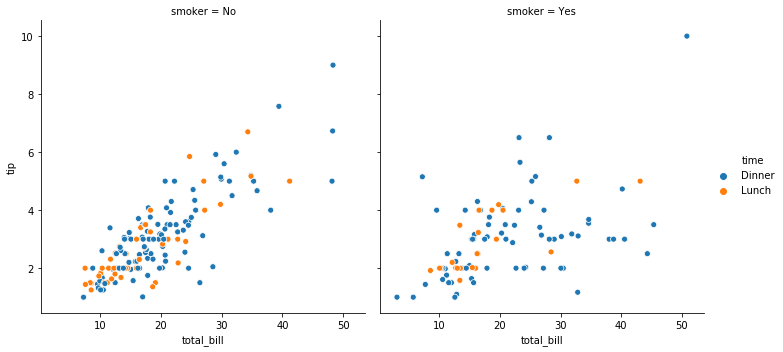

In [18]:
sns.relplot(x='total_bill',y='tip',hue='time',col='smoker',data=tips)